<a href="https://colab.research.google.com/github/Physsionist/deep_architecture/blob/main/preprocessing_from_kaggle.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Imports

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
base_path = "drive/MyDrive/Colab_Notebooks/deep_learning/final_project/deep_architects/"

In [4]:
import pandas as pd
pd.set_option('display.max_rows', 100)
pd.set_option('display.max_columns', 100)
pd.set_option('display.max_colwidth', 100)

import cv2
import matplotlib.pyplot as plt

import os

# Setup Dataframe with Paths Directly from Kaggle



In [6]:
# copy in YOUR kaggle key
!cp "drive/MyDrive/Colab_Notebooks/deep_learning/final_project/deep_architects/kaggle.json" kaggle.json

In [7]:
!pip install -q kaggle

!rm -r ~/.kaggle
!mkdir ~/.kaggle
!mv ./kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

rm: cannot remove '/root/.kaggle': No such file or directory


### Source Data

https://www.kaggle.com/datasets/dumitrux/architectural-styles-dataset

In [8]:
! kaggle datasets download -d dumitrux/architectural-styles-dataset

100% 1.56G/1.56G [00:54<00:00, 41.8MB/s]
100% 1.56G/1.56G [00:54<00:00, 30.7MB/s]


In [9]:
!unzip -q architectural-styles-dataset.zip

! rm -r /content/g-images-dataset

In [10]:
lst = []
labels = []
for root, dirs, files in os.walk("architectural-styles-dataset", topdown=False):
    for name in files:
        lst.append(os.path.join(root, name))
    for name in dirs:
        labels.append(name)

lst[:10]

['architectural-styles-dataset/International style/416_800px-Hamilton_City_Hall_in_Hamilton%2C_Ontario%2C_from_Commonwealth_Square.jpg',
 'architectural-styles-dataset/International style/009862.jpg',
 'architectural-styles-dataset/International style/1717_450px-Seagrambuilding.JPG',
 'architectural-styles-dataset/International style/1766_450px-The_United_Nations.jpg',
 'architectural-styles-dataset/International style/1412_399px-BB%26T_Bank_Building%2C_Asheville%2C_NC.jpg',
 'architectural-styles-dataset/International style/1400_Richard_B._Russell_Federal_Building_and_Courthouse%2C_Atlanta_%28Fulton_County%2C_Georgia%29.jpg',
 'architectural-styles-dataset/International style/009910.jpg',
 'architectural-styles-dataset/International style/009984.jpg',
 'architectural-styles-dataset/International style/010236.jpg',
 'architectural-styles-dataset/International style/010067.jpg']

In [11]:
df_1 = pd.DataFrame(labels, columns=['class_label']) 
df_1 = df_1.sort_values('class_label')

df_1['class_index'] = df_1.reset_index().index
df_1.head(5)

,class_label,class_index
7,Achaemenid architecture,0
15,American Foursquare architecture,1
4,American craftsman style,2
6,Ancient Egyptian architecture,3
16,Art Deco architecture,4


In [12]:
df_paths = pd.DataFrame(lst, columns=['filepath'])
df_paths['class_label'] = df_paths['filepath'].str.extract("(" + "|".join(df_1.class_label) + ')', expand=False)

df_paths = df_paths.sort_values('class_label')

print(df_paths.shape)
df_paths.head()

(10113, 2)


,filepath,class_label
3051,architectural-styles-dataset/Achaemenid architecture/000075.jpg,Achaemenid architecture
3251,architectural-styles-dataset/Achaemenid architecture/000218.jpg,Achaemenid architecture
3252,architectural-styles-dataset/Achaemenid architecture/000244.jpg,Achaemenid architecture
3253,architectural-styles-dataset/Achaemenid architecture/000226.jpg,Achaemenid architecture
3254,architectural-styles-dataset/Achaemenid architecture/000353.jpg,Achaemenid architecture


In [13]:
df_join = df_1.merge(df_paths, on='class_label', how='inner')
df_join = df_join[['class_index', 'class_label', 'filepath']]

print(df_join.shape)
df_join.head()

(10113, 3)


,class_index,class_label,filepath
0,0,Achaemenid architecture,architectural-styles-dataset/Achaemenid architecture/000075.jpg
1,0,Achaemenid architecture,architectural-styles-dataset/Achaemenid architecture/000218.jpg
2,0,Achaemenid architecture,architectural-styles-dataset/Achaemenid architecture/000244.jpg
3,0,Achaemenid architecture,architectural-styles-dataset/Achaemenid architecture/000226.jpg
4,0,Achaemenid architecture,architectural-styles-dataset/Achaemenid architecture/000353.jpg


In [14]:
height = []
width = []

for path in df_join['filepath']:
    img = cv2.imread(path)
    height.append(img.shape[0])
    width.append(img.shape[1])

In [15]:
df_join['height'] = height
df_join['width'] = width

In [16]:
df_join.head(2)

,class_index,class_label,filepath,height,width
0,0,Achaemenid architecture,architectural-styles-dataset/Achaemenid architecture/000075.jpg,334,500
1,0,Achaemenid architecture,architectural-styles-dataset/Achaemenid architecture/000218.jpg,1000,650


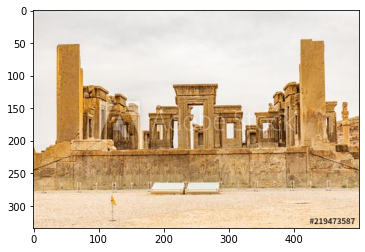

In [18]:
image_path = df_join['filepath'].iloc[0]
img = cv2.imread(image_path)
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB));

In [19]:
# save to your gdrive
df_join.to_csv(base_path + 'styles_filepath_kaggle.csv', index=False)

# Preprocessing - Scale Images

In [20]:
df_join = pd.read_csv(base_path + 'styles_filepath_kaggle.csv')
df_join.head(2)

,class_index,class_label,filepath,height,width
0,0,Achaemenid architecture,architectural-styles-dataset/Achaemenid architecture/000075.jpg,334,500
1,0,Achaemenid architecture,architectural-styles-dataset/Achaemenid architecture/000218.jpg,1000,650


### Distributions

In [38]:
df_join.width.sort_values()

9416      90
7610     115
7297     120
7441     120
8045     127
        ... 
5687    3648
5880    3648
5655    3648
5697    3740
5756    4272
Name: width, Length: 10113, dtype: int64

In [39]:
df_join.height.sort_values()

8045      80
7297      90
7441     101
9416     120
7610     120
        ... 
5975    4288
6292    4288
6286    4288
6212    4288
6025    4288
Name: height, Length: 10113, dtype: int64

### Plot image dimensions - about half have a height of less than 600 pixels

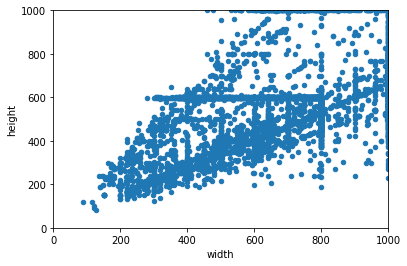

In [24]:
df_join.plot.scatter(x='width', y='height', xlim=(0,1000), ylim=(0,1000));

In [23]:
df_join[df_join['height']<600].shape

(5108, 5)

In [26]:
df_join.head(3)

,class_index,class_label,filepath,height,width
0,0,Achaemenid architecture,architectural-styles-dataset/Achaemenid architecture/000075.jpg,334,500
1,0,Achaemenid architecture,architectural-styles-dataset/Achaemenid architecture/000218.jpg,1000,650
2,0,Achaemenid architecture,architectural-styles-dataset/Achaemenid architecture/000244.jpg,678,1000


## Before

(386, 515, 3)


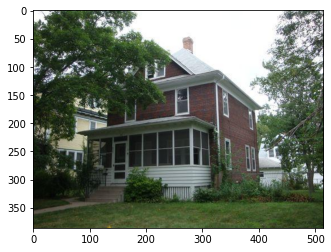

In [28]:
path = df_join['filepath'].iloc[500]
img = cv2.imread(path)
print(img.shape)
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB));

## Proposed Change

(256, 256, 3)


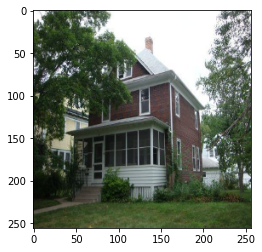

In [29]:
path = df_join['filepath'].iloc[500]
img = cv2.imread(path)
img = cv2.resize(img, dsize = (256, 256)) 
print(img.shape)
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB));

In [30]:
for index, row in df_join.iterrows():
    path = row['filepath']
    img = cv2.imread(path)
    img = cv2.resize(img, dsize = (256, 256)) 
    cv2.imwrite(path, img)

## After

(256, 256, 3)


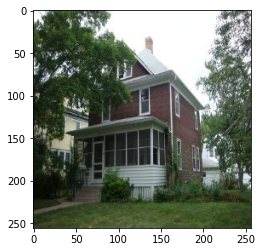

In [31]:
path = df_join['filepath'].iloc[500]
img = cv2.imread(path)
print(img.shape)
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB));

### Save for later

In [33]:
!zip -r -q archive_new.zip architectural-styles-dataset
!rm -r architectural-styles-dataset

In [ ]:
! cp archive_new.zip "drive/MyDrive/Colab_Notebooks/deep_learning/final_project/deep_architects/archive_new_6.27_256x256.zip" 

In [ ]:
!rm -r archive_new.zip